In [2]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [3]:
import pandas as pd
import numpy as np

# Load the train and test datasets from CSV
train = pd.read_csv('train.csv')  # Train data should be loaded here
test = pd.read_csv('test.csv')  # Test data should be loaded here


# If the column is named 'label', this will work:
# Separate features (images) and labels (digits) in the train set
X_train = train.drop(columns=['label']).values  # Drop the 'label' column to get the features
y_train = train['label'].values  # The 'label' column contains the digits (0-9)

# Reshape the image data to the format (num_samples, 28, 28)
X_train = X_train.reshape(-1, 28, 28)

# Similarly, handle the test set (without labels)
X_test = test.values  # No labels in the test set
X_test = X_test.reshape(-1, 28, 28)

# Print the shapes to verify
print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

Training data shape: (42000, 28, 28)
Test data shape: (28000, 28, 28)


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split


In [5]:


# Normalize pixel values to be between 0 and 1 (important for CNN performance)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Split the training data into training and validation sets (80%/20%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [6]:

# Build the CNN model
model = models.Sequential([
    layers.InputLayer(input_shape=(28, 28, 1)),  # Input layer, reshaped to 28x28x1 (grayscale)

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output units for 10 digit classes (0-9)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [7]:

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [8]:

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))


Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 65s 121ms/step - accuracy: 0.8421 - loss: 0.5102 - val_accuracy: 0.9758 - val_loss: 0.0740
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 81s 120ms/step - accuracy: 0.9821 - loss: 0.0554 - val_accuracy: 0.9831 - val_loss: 0.0496
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 63s 120ms/step - accuracy: 0.9888 - loss: 0.0363 - val_accuracy: 0.9889 - val_loss: 0.0303
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 81s 119ms/step - accuracy: 0.9918 - loss: 0.0235 - val_accuracy: 0.9888 - val_loss: 0.0346
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 63s 121ms/step - accuracy: 0.9940 - loss: 0.0192 - val_accuracy: 0.9885 - val_loss: 0.0324
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 81s 119ms/step - accuracy: 0.9948 - loss: 0.0158 - val_accuracy: 0.9874 - val_loss: 0.0429
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 62s 118ms/step - accuracy: 0.9959 - loss: 0.0128 - val_accuracy: 0.9877 - val_loss: 0.0445
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 82s 117ms/step - accuracy: 0.9965 - loss: 0

In [10]:
test_loss, test_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Test Loss: 0.0302390456199646
Test Accuracy: 0.9917857050895691


In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [12]:


# Flatten the image data to 1D (28x28 -> 784)
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

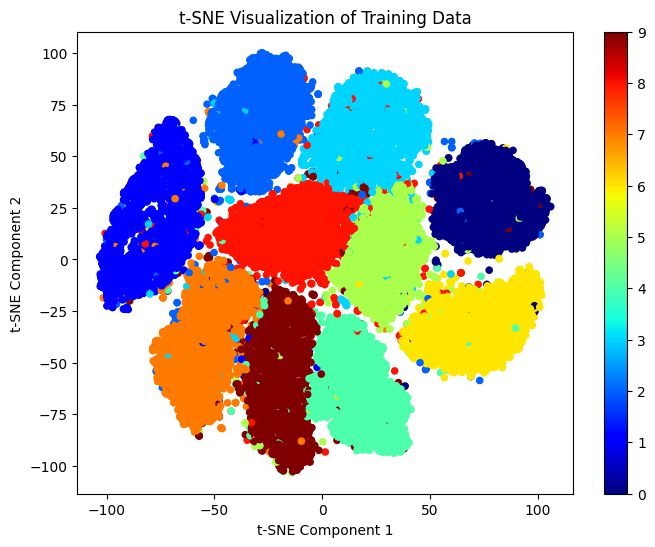

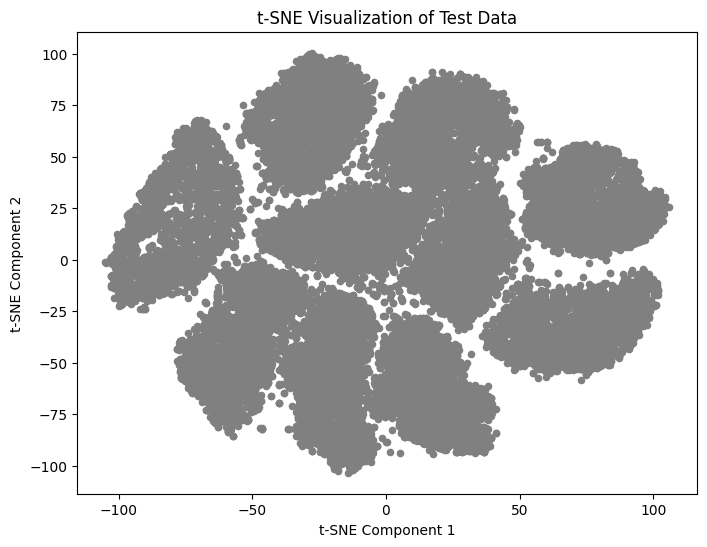

In [13]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Combine the training and test data to apply t-SNE together
X_combined = np.vstack([X_train_flattened, X_test_flattened])
# Apply t-SNE for dimensionality reduction (to 2D)
tsne = TSNE(n_components=2, random_state=42)
# Fit t-SNE on the combined data
X_combined_tsne = tsne.fit_transform(X_combined)

# Separate the transformed data back into X_train_tsne and X_test_tsne
X_train_tsne = X_combined_tsne[:X_train_flattened.shape[0], :]
X_test_tsne = X_combined_tsne[X_train_flattened.shape[0]:, :]

# Visualize t-SNE results (on the training data)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='jet', s=20)
plt.colorbar()
plt.title('t-SNE Visualization of Training Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# You can also plot the test data
plt.figure(figsize=(8, 6))
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c='gray', s=20)  # Test data is often not labeled
plt.title('t-SNE Visualization of Test Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


In [16]:

# Initialize classifiers
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(kernel='linear', random_state=42)
dt = DecisionTreeClassifier(random_state=42)

# Train and evaluate each classifier
classifiers = {'KNN': knn, 'Random Forest': rf, 'SVM': svm, 'Decision Tree': dt}

for name, clf in classifiers.items():
    # Fit classifier on the reduced training data (from t-SNE)
    clf.fit(X_train_tsne, y_train)

    # Predict on the test data (reduced to 2D using t-SNE)
    y_pred = clf.predict(X_test_tsne)

    # Calculate accuracy and print classification report
    accuracy = accuracy_score(y_train, clf.predict(X_train_tsne))  # Training accuracy
   # test_accuracy = accuracy_score(y_test, y_pred)  # Test accuracy

    print(f'{name} Accuracy:')
    print(f'Training Accuracy: {accuracy:.4f}')
   # print(f'Test Accuracy: {test_accuracy:.4f}')
    print('Classification Report:')
   # print(classification_report(y_test, y_pred))
    print('-' * 50)


KNN Accuracy:
Training Accuracy: 0.9745
Classification Report:
--------------------------------------------------
Random Forest Accuracy:
Training Accuracy: 0.9999
Classification Report:
--------------------------------------------------
SVM Accuracy:
Training Accuracy: 0.9643
Classification Report:
--------------------------------------------------
Decision Tree Accuracy:
Training Accuracy: 1.0000
Classification Report:
--------------------------------------------------


Comparison of Classification Performance:
--------------------------------------------------
CNN Accuracy (Step 1): 0.9900
Base Models with Dimensionality Reduction (Step 2):
KNN: 0.9745
Random Forest: 0.9999
SVM: 0.9643
Decision Tree: 1.0000
--------------------------------------------------
The following models from Step 2 outperform the CNN: Random Forest, Decision Tree


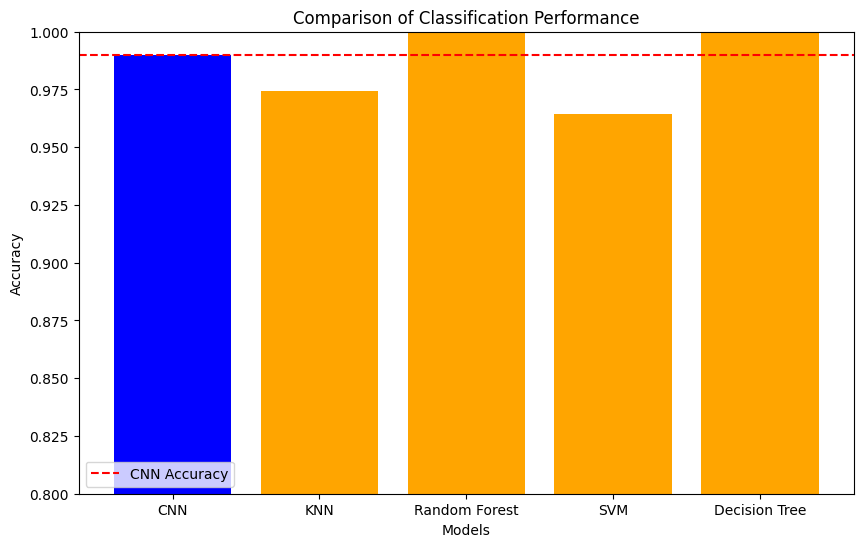

In [18]:

cnn_accuracy = 0.99
base_model_accuracies = {
    'KNN': 0.9745,
    'Random Forest': 0.9999,
    'SVM': 0.9643,
    'Decision Tree': 1.0000
}


print("Comparison of Classification Performance:")
print("-" * 50)
print(f"CNN Accuracy (Step 1): {cnn_accuracy:.4f}")
print("Base Models with Dimensionality Reduction (Step 2):")
for model, accuracy in base_model_accuracies.items():
    print(f"{model}: {accuracy:.4f}")
print("-" * 50)

better_models = [model for model, acc in base_model_accuracies.items() if acc > cnn_accuracy]
if better_models:
    print(f"The following models from Step 2 outperform the CNN: {', '.join(better_models)}")
else:
    print("The CNN outperforms all models with dimensionality reduction.")

import matplotlib.pyplot as plt

models = ['CNN'] + list(base_model_accuracies.keys())
accuracies = [cnn_accuracy] + list(base_model_accuracies.values())

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue'] + ['orange'] * len(base_model_accuracies))
plt.title('Comparison of Classification Performance')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)  # Adjust based on your accuracy range
plt.axhline(y=cnn_accuracy, color='r', linestyle='--', label='CNN Accuracy')
plt.legend()
plt.show()
